# PROYECTO

##Beatriz González Oblanca
### Sistemas de Información en Entornos Biomédicos (Ingeniería Biomédica)

#CARGAMOS LOS DATOS Y LOS UNIMOS EN UN ÚNICO DOCUMENTO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import scale
drive.mount('/content/drive')
documento1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trabajo_SIEB_1.csv')
documento2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trabajo_SIEB_2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Unimos los dos documentos en uno solo para poder trabajar con todo el conjunto de datos
#Ambos archivos tienen las mismas columnas

#DOCUMENTO
documento = pd.concat([documento1, documento2], axis=0, ignore_index=True)
#reindexo los índices de la tabla para que no me de problemas posteriormente

#COMPROBACIÓN DE ERRORES

In [ ]:
#Verificamos que la columna 0 no tiene valores repetidos
valores_duplicados = documento['col_0'].duplicated()
if valores_duplicados.any():
    print('Hay valores duplicados en la columna')
else:
    print('No hay valores duplicados en la columna')

No hay valores duplicados en la columna


In [ ]:
#VEMOS LOS DATOS QUE TENEMOS EN LA COLUMNA 6
documento.col_6.unique()

array(['Alto', 'Medium', 'Bajo', 'Low', 'Medio', 'High'], dtype=object)

In [ ]:
#Observamos que se utilizan palabras en inglés y en castellano para expresar lo mismo, por lo que unificamos todo en castellano
documento ['col_6']= documento ['col_6'].replace('High', 'Alto')
documento ['col_6']= documento ['col_6'].replace('Medium', 'Medio')
documento ['col_6']= documento ['col_6'].replace('Low', 'Bajo')
documento.col_6.unique()

array(['Alto', 'Medio', 'Bajo'], dtype=object)

In [ ]:
documento.col_7.unique()
#la columna 7 está correcta

array(['Sí', 'No'], dtype=object)

In [ ]:
#Compobamos el tipo de datos que hay en las columna
print('Tipo de datos de la columna 1:',documento['col_1'].dtypes)
print('Tipo de datos de la columna 2:',documento['col_2'].dtypes)
print('Tipo de datos de la columna 3:',documento['col_3'].dtypes)
print('Tipo de datos de la columna 4:',documento['col_4'].dtypes)
print('Tipo de datos de la columna 5:',documento['col_5'].dtypes)

Tipo de datos de la columna 1: float64
Tipo de datos de la columna 2: float64
Tipo de datos de la columna 3: float64
Tipo de datos de la columna 4: float64
Tipo de datos de la columna 5: float64


##COMPROBACIÓN Y MODIFICACIÓN DE LOS DATOS NUMÉRICOS

In [ ]:
#COLUMNA 1

#COMPROBAMOS QUE TODOS LOS DATOS SON NUMÉRICOS
if documento['col_1'].dtype == 'float64':
    print('Todos los datos de la columna son de tipo float64')
else:
    print('Hay datos de otros tipos en la columna')

#COMPROBAMOS SI HAY VALORES NULOS
valores_nulos = documento['col_1'].isna()
if valores_nulos.any():
    print('Hay valores nulos en la columna')
else:
    print('No hay valores nulos en la columna')

Todos los datos de la columna son de tipo float64
Hay valores nulos en la columna


In [ ]:
#COLUMNA 2

#COMPROBAMOS QUE TODOS LOS DATOS SON NUMÉRICOS
if documento['col_2'].dtype == 'float64':
    print('Todos los datos de la columna son de tipo float64')
else:
    print('Hay datos de otros tipos en la columna')

#COMPROBAMOS SI HAY VALORES NULOS
valores_nulos2 = documento['col_2'].isna()
if valores_nulos2.any():
    print('Hay valores nulos en la columna')
else:
    print('No hay valores nulos en la columna')

Todos los datos de la columna son de tipo float64
Hay valores nulos en la columna


In [ ]:
#COLUMNA 3

#COMPROBAMOS QUE TODOS LOS DATOS SON NUMÉRICOS
if documento['col_3'].dtype == 'float64':
    print('Todos los datos de la columna son de tipo float64')
else:
    print('Hay datos de otros tipos en la columna')


#COMPROBAMOS SI HAY VALORES NULOS
valores_nulos3 = documento['col_3'].isna()
if valores_nulos3.any():
    print('Hay valores nulos en la columna')
else:
    print('No hay valores nulos en la columna')

Todos los datos de la columna son de tipo float64
Hay valores nulos en la columna


In [ ]:
#COLUMNA 4

#COMPROBAMOS QUE TODOS LOS DATOS SON NUMÉRICOS
if documento['col_4'].dtype == 'float64':
    print('Todos los datos de la columna son de tipo float64')
else:
    print('Hay datos de otros tipos en la columna')

#COMPROBAMOS SI HAY VALORES NULOS
valores_nulos4 = documento['col_4'].isna()
if valores_nulos4.any():
    print('Hay valores nulos en la columna')
else:
    print('No hay valores nulos en la columna')

Todos los datos de la columna son de tipo float64
Hay valores nulos en la columna


In [ ]:
#COLUMNA 5

#COMPROBAMOS QUE TODOS LOS DATOS SON NUMÉRICOS
if documento['col_5'].dtype == 'float64':
    print('Todos los datos de la columna son de tipo float64')
else:
    print('Hay datos de otros tipos en la columna')

#COMPROBAMOS SI HAY VALORES NULOS
valores_nulos5 = documento['col_5'].isna()
if valores_nulos5.any():
    print('Hay valores nulos en la columna')
else:
    print('No hay valores nulos en la columna')

Todos los datos de la columna son de tipo float64
No hay valores nulos en la columna


Por lo tanto, todos los datos introducidos en las columnas (1-5) son de tipo numéricos, sin embargo en las columnas 1,2,3,4 existen valores nulos.

In [ ]:
#Eliminamos los datos nulos del documento
documento = documento.dropna()

#En realidad podria haber hecho directamente, al saber que existian valores nulos en el documento
#pero mi idea inicial era ir eliminándolos columna por columna pero me daba error
#finalmente encontré esta solución

In [ ]:
#Comprobamos que ahora no aparecen

if documento.isnull().any().any():
   print('Hay valores nulos en el documento')
else:
   print('No hay valores nulos en el documento')

No hay valores nulos en el documento


#ANÁLISIS EXPLORATORIO

In [ ]:
print(documento.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7'], dtype='object')


##MAPA DE CALOR

<ipython-input-16-9698d6890b23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = documento.corr()


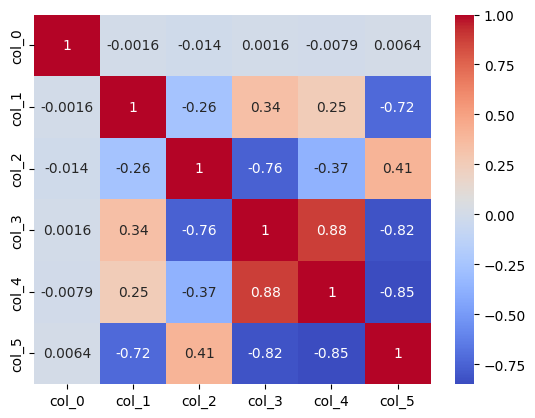

In [ ]:
corr_matrix = documento.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Observamos un fuerte correlación entre la columna 3 y 4 y una correlación inversa de ambas con la columna 5.

#REDUCCIÓN DE DIMENSIONALIDAD

In [ ]:
col_3 = documento['col_3']
col_4 = documento['col_4']
col_5 = documento['col_5']
columnas = np.column_stack((col_3, col_4, col_5))
pca = PCA(n_components=2) #reducimos a 2 dimensiones
pca.fit(columnas)
componentes_principales = pca.components_
varianza_explicada = pca.explained_variance_ratio_

# Imprime los componentes principales y la varianza explicada
print("Componentes principales:")
print(componentes_principales)
print("Varianza explicada:")
print(varianza_explicada)

Componentes principales:
[[ 0.71784383  0.51242426 -0.4712978 ]
 [ 0.6276708  -0.18345672  0.75655337]]
Varianza explicada:
[0.90717203 0.05973829]


Observamos que la primera dirección explica el 90,71% de los datos, mientras que la segunda solo un 5,97%. Por este motivo reduciremos a una sola dimensión.

In [ ]:
#reducimos a 1 dimensión
pca = PCA(n_components=1)
pca.fit(columnas)
datos_transformados = pca.transform(columnas)

#Comprobamos que las dimensiones son las mismas para posteriormente concatenar los datos
print('Las dimensiones de los datos transformados son:', datos_transformados.shape)
print('Las dimensiones de la columna 0 son:', documento.col_0.shape)
print('Las dimensiones de la columna 1 son:', documento.col_1.shape)
print('Las dimensiones de la columna 2 son:', documento.col_2.shape)
print('Las dimensiones de la columna 6 son:', documento.col_6.shape)
print('Las dimensiones de la columna 7 son:', documento.col_7.shape)

Las dimensiones de los datos transformados son: (5005, 1)
Las dimensiones de la columna 0 son: (5005,)
Las dimensiones de la columna 1 son: (5005,)
Las dimensiones de la columna 2 son: (5005,)
Las dimensiones de la columna 6 son: (5005,)
Las dimensiones de la columna 7 son: (5005,)


In [ ]:
#Dado que los cambios solo los realizamos en relación a las columnas 3, 4 y 5 uniremos los cambios a las demás columnas
documentos= documento[['col_0', 'col_1', 'col_2', 'col_6', 'col_7']].copy()
documentos['col_8'] = datos_transformados
#Verifico que mi nuevo dataframe
print(documentos.head())

   col_0     col_1     col_2  col_6 col_7     col_8
0      1 -0.580070  0.995478   Alto    Sí -0.931332
1      2  0.222348  0.831630  Medio    No -1.862672
2      3 -0.441711  0.778408   Alto    Sí -2.089730
3      4  0.892731 -0.606429   Bajo    No  1.841154
4      5  1.004719  0.412743   Bajo    No  0.030833


In [ ]:
#Para poder tratar los datos, convertiremos la columna 6 en números enteros donde bajo=0, medio=1 y alto=2

documentos['col_6'] = documentos['col_6'].replace({'Alto': 2, 'Medio': 1, 'Bajo': 0})
print(documentos.head())

   col_0     col_1     col_2  col_6 col_7     col_8
0      1 -0.580070  0.995478      2    Sí -0.931332
1      2  0.222348  0.831630      1    No -1.862672
2      3 -0.441711  0.778408      2    Sí -2.089730
3      4  0.892731 -0.606429      0    No  1.841154
4      5  1.004719  0.412743      0    No  0.030833


#ALGORITMOS DE CLASIFICACIÓN

##KNN

El valor de k que produce la mayor precisión es 7 con una precisión de 0.52


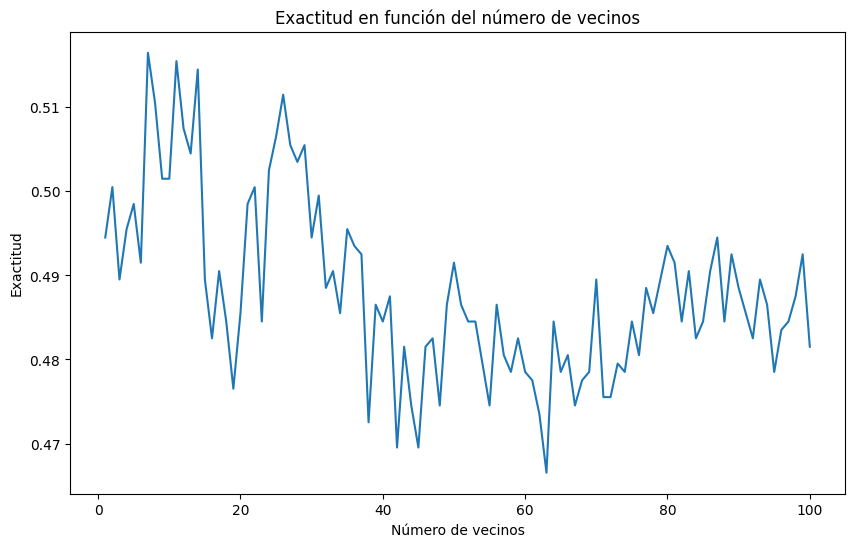

In [ ]:
#Definimos las variables
x=documentos.drop(['col_7'], axis=1)
y=documentos['col_7'] #columna a predecir

#Separamos conjuntos de entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

#VAMOS A VALORAR CUAL ES EL NÚMERO ÓPTIMO DE VECINOS
accuracies = []
for k in range(1, 101):
    # Crear el clasificador KNN con k vecinos
    clasificador = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador con los datos de entrenamiento
    clasificador.fit(x_train, y_train)

    # Obtener las predicciones para los datos de validación
    y_pred = clasificador.predict(x_test)

    # Calcular la exactitud (accuracy) de la predicción y guardarla en la lista accuracies
    precision = accuracy_score(y_test, y_pred)
    accuracies.append(precision)

best_acc = max(accuracies)
best_k = accuracies.index(best_acc) + 1
print(f"El valor de k que produce la mayor precisión es {best_k} con una precisión de {best_acc:.2f}")
plt.figure(figsize=(10,6))
plt.plot(range(1,101), accuracies)
plt.title('Exactitud en función del número de vecinos')
plt.xlabel('Número de vecinos')
plt.ylabel('Exactitud')
plt.show()


In [ ]:
#Dado que el valor óptimo de vecinos es 7:

#Estandarización de entradas
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #ajuste y estandarización de datos de entrenamiento
x_test = sc.transform(x_test)#aplicar la estandarización a los datos de prueba

#Entrenamos el clasificador
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)#

#Predicción
KNN_pred = classifier.predict(x_test)

#Calculo de la exactitud
KNN_ac = accuracy_score(y_test, KNN_pred)
print("Exactitud:",KNN_ac)

#Matriz de confusión
KNN_mc = confusion_matrix(y_test, KNN_pred)
print("Matriz de confusión:\n",KNN_mc)

# Calcular la métrica F1
KNN_f1 = classification_report(y_test, KNN_pred)
print("La métrica F1 es de:\n",KNN_f1)

# Calcular la sensibilidad y precisión
KNN_sen = KNN_mc[1, 1] / (KNN_mc[1, 0] + KNN_mc[1, 1])
KNN_pre = KNN_mc[1, 1] / (KNN_mc[0, 1] + KNN_mc[1, 1])
print("La sensibilidad es de:\n",KNN_sen)
print("La precisión es de:\n",KNN_pre)

Exactitud: 0.8401598401598401
Matriz de confusión:
 [[393  86]
 [ 74 448]]
La métrica F1 es de:
               precision    recall  f1-score   support

          No       0.84      0.82      0.83       479
          Sí       0.84      0.86      0.85       522

    accuracy                           0.84      1001
   macro avg       0.84      0.84      0.84      1001
weighted avg       0.84      0.84      0.84      1001

La sensibilidad es de:
 0.8582375478927203
La precisión es de:
 0.8389513108614233


In [ ]:
lineas = KNN_f1.strip().split('\n')
# Obtenemos el valor concreto de f1-score weighted avg
KNN_f1= float(lineas[6].split()[4])
print("Valor:", KNN_f1)

Valor: 0.84


##REGRESIÓN LOGÍSTICA

In [ ]:
#Creamos el modelo
regresion_log = LogisticRegression()

#Entrenamos el modelo
regresion_log.fit(x_train, y_train)

# Predicción
regre_pred = regresion_log.predict(x_test)

#Calculo de la exactitud
regre_ac = accuracy_score(y_test, regre_pred)
print("Exactitud:",regre_ac)

#Matriz de confusión
regre_mc = confusion_matrix(y_test, regre_pred)
print("Matriz de confusión:\n",regre_mc)

# Calcular la métrica F1
regre_f1 = classification_report(y_test, regre_pred)
print("La métrica F1 es de:\n",regre_f1)
# Calcular la sensibilidad y precisión
regre_sen = regre_mc[1, 1] / (regre_mc[1, 0] + regre_mc[1, 1])
regre_pre = regre_mc[1, 1] / (regre_mc[0, 1] + regre_mc[1, 1])
print("La sensibilidad es de:\n",regre_sen)
print("La precisión es de:\n",regre_pre)

Exactitud: 0.46553446553446554
Matriz de confusión:
 [[292 187]
 [348 174]]
La métrica F1 es de:
               precision    recall  f1-score   support

          No       0.46      0.61      0.52       479
          Sí       0.48      0.33      0.39       522

    accuracy                           0.47      1001
   macro avg       0.47      0.47      0.46      1001
weighted avg       0.47      0.47      0.46      1001

La sensibilidad es de:
 0.3333333333333333
La precisión es de:
 0.481994459833795


In [ ]:
lineas = regre_f1.strip().split('\n')
# Obtenemos el valor concreto de f1-score weighted avg
regre_f1= float(lineas[6].split()[4])
print("Valor:", regre_f1)

Valor: 0.46


##ÁRBOL DE DECISIÓN

In [ ]:
# Creaamos el modelo
decision_tree = DecisionTreeClassifier()

# Entrenamos el modelo
decision_tree.fit(x_train, y_train)

# Predicción
arbol_pred = decision_tree.predict(x_test)

#Calculo de la exactitud
arbol_ac = accuracy_score(y_test, arbol_pred)
print("Exactitud:",arbol_ac)

#Matriz de confusión
arbol_mc = confusion_matrix(y_test, arbol_pred)
print("Matriz de confusión:\n",arbol_mc)

# Calcular la métrica F1
arbol_f1 = classification_report(y_test, arbol_pred)
print("La métrica F1 es de:\n",arbol_f1)
# Calcular la sensibilidad y precisión
arbol_sen = regre_mc[1, 1] / (arbol_mc[1, 0] + arbol_mc[1, 1])
arbol_pre = regre_mc[1, 1] / (arbol_mc[0, 1] + arbol_mc[1, 1])
print("La sensibilidad es de:\n",regre_sen)
print("La precisión es de:\n",arbol_pre)

Exactitud: 0.7962037962037962
Matriz de confusión:
 [[392  87]
 [117 405]]
La métrica F1 es de:
               precision    recall  f1-score   support

          No       0.77      0.82      0.79       479
          Sí       0.82      0.78      0.80       522

    accuracy                           0.80      1001
   macro avg       0.80      0.80      0.80      1001
weighted avg       0.80      0.80      0.80      1001

La sensibilidad es de:
 0.3333333333333333
La precisión es de:
 0.35365853658536583


In [ ]:
lineas = arbol_f1.strip().split('\n')
# Obtenemos el valor concreto de f1-score weighted avg
arbol_f1= float(lineas[6].split()[4])
print("Valor:", arbol_f1)

Valor: 0.8


##SVM

###Escogemos el mejor valor de C

In [ ]:
# Definir el rango de valores de C
valores_C = range(1, 130) #la primera vez lo hice entre 1 y 1001 y me dio 125 por lo que después lo deje entre 1-130 para que no tardara tanto en cargar

# Variables para almacenar el mejor valor de C y la mejor precisión
mejor_C = None
mejor_precision = 0

# Hacemos un bucle para ir recorriendo todos los números del 1-130
for C in valores_C:
  svm_model = SVC(C=C)
  svm_model.fit(x_train, y_train)
  y_pred = svm_model.predict(x_test)
  precision = accuracy_score(y_test, y_pred)

# Verificar si es el mejor valor de C encontrado hasta ahora
  if precision > mejor_precision:
   mejor_C = C
   mejor_precision = precision

print("El mejor valor de C encontrado:", mejor_C)
print("Precisión del mejor modelo:", mejor_precision)

El mejor valor de C encontrado: 125
Precisión del mejor modelo: 0.8731268731268731


In [ ]:
#Escalamos las entradas de entrenamiento
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

# Creamos el modelo SVM
svm_model = SVC(C=125)

# Entrenamos el modelo
svm_model.fit(x_train_scaled, y_train)

# Predicción
SVM_pred = svm_model.predict(x_test)

#Calculo de la exactitud
SVM_ac = accuracy_score(y_test, SVM_pred)
print("Exactitud:",SVM_ac)

#Matriz de confusión
SVM_mc = confusion_matrix(y_test, SVM_pred)
print("Matriz de confusión:\n",SVM_mc)

# Calcular la métrica F1
SVM_f1 = classification_report(y_test, SVM_pred)
print("La métrica F1 es de:\n",SVM_f1)
# Calcular la sensibilidad y precisión
SVM_sen = SVM_mc[1, 1] / (SVM_mc[1, 0] + SVM_mc[1, 1])
SVM_pre = SVM_mc[1, 1] / (SVM_mc[0, 1] + SVM_mc[1, 1])
print("La sensibilidad es de:\n",SVM_sen)
print("La precisión es de:\n",SVM_pre)

Exactitud: 0.8731268731268731
Matriz de confusión:
 [[412  67]
 [ 60 462]]
La métrica F1 es de:
               precision    recall  f1-score   support

          No       0.87      0.86      0.87       479
          Sí       0.87      0.89      0.88       522

    accuracy                           0.87      1001
   macro avg       0.87      0.87      0.87      1001
weighted avg       0.87      0.87      0.87      1001

La sensibilidad es de:
 0.8850574712643678
La precisión es de:
 0.8733459357277883


In [ ]:
lineas = SVM_f1.strip().split('\n')
# Obtenemos el valor concreto de f1-score weighted avg
SVM_f1= float(lineas[6].split()[4])
print("Valor:", SVM_f1)

Valor: 0.87


##Random Forest

In [ ]:
# Crear el modelo de Random Forest
random_forest = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento
random_forest.fit(x_train, y_train)

# Realizar predicciones con el modelo entrenado
forest_pred= random_forest.predict(x_test)


#Calculo de la exactitud
forest_ac = accuracy_score(y_test, forest_pred)
print("Exactitud:",forest_ac)

#Matriz de confusión
forest_mc = confusion_matrix(y_test, forest_pred)
print("Matriz de confusión:\n",forest_mc)

# Calcular la métrica F1
forest_f1 = classification_report(y_test, forest_pred)
print("La métrica F1 es de:\n",forest_f1)
# Calcular la sensibilidad y precisión
forest_sen = forest_mc[1, 1] / (forest_mc[1, 0] + forest_mc[1, 1])
forest_pre = forest_mc[1, 1] / (forest_mc[0, 1] + forest_mc[1, 1])
print("La sensibilidad es de:\n",forest_sen)
print("La precisión es de:\n",forest_pre)

Exactitud: 0.8441558441558441
Matriz de confusión:
 [[411  68]
 [ 88 434]]
La métrica F1 es de:
               precision    recall  f1-score   support

          No       0.82      0.86      0.84       479
          Sí       0.86      0.83      0.85       522

    accuracy                           0.84      1001
   macro avg       0.84      0.84      0.84      1001
weighted avg       0.84      0.84      0.84      1001

La sensibilidad es de:
 0.8314176245210728
La precisión es de:
 0.8645418326693227


In [ ]:
lineas = forest_f1.strip().split('\n')
# Obtenemos el valor concreto de f1-score weighted avg
forest_f1= float(lineas[6].split()[4])
print("Valor:", forest_f1)

Valor: 0.84


#Tabla comparativa

In [ ]:
Algoritmo = np.array(['KNN','Regresión logística','Árboles de decisión', 'SVM', 'Random forest'])
Exactitud= np.array([KNN_ac,regre_ac,arbol_ac,SVM_ac,forest_ac])
Verdaderos_positivos= np.array([KNN_mc[0,0],regre_mc[0,0],arbol_mc[0,0],SVM_mc[0,0],forest_mc[0,0]])
Verdaderos_negativos= np.array([KNN_mc[1,1],regre_mc[1,1],arbol_mc[1,1],SVM_mc[1,1],forest_mc[1,1]])
Falsos_positivos= np.array([KNN_mc[1,0],regre_mc[1,0],arbol_mc[1,0],SVM_mc[1,0],forest_mc [1,0]])
Falsos_negativos= np.array([KNN_mc[0,1],regre_mc[0,1],arbol_mc[0,1],SVM_mc[0,1],forest_mc[0,1]])
F1_score=np.array([KNN_f1,regre_f1,arbol_f1,SVM_f1,forest_f1])
Sensibilidad= np.array([KNN_sen,regre_sen,arbol_sen,SVM_sen,forest_sen])
Precisión= np.array([KNN_pre,regre_pre,arbol_pre,SVM_pre,forest_pre])

data = {
    'Algoritmo': Algoritmo,
    'Exactitud': Exactitud,
    'Verdaderos positivos': Verdaderos_positivos,
    'Verdaderos negativos': Verdaderos_negativos,
    'Falsos positivos': Falsos_positivos,
    'Falsos negativos': Falsos_negativos,
    'Métrica F1': F1_score,
    'Sensibilidad': Sensibilidad,
    'Precisión': Precisión
}
# Crear la tabla utilizando el diccionario de datos
tabla = pd.DataFrame(data)

# Imprimir la tabla resultante
print(tabla)


             Algoritmo  Exactitud  Verdaderos positivos  Verdaderos negativos  \
0                  KNN   0.840160                   393                   448   
1  Regresión logística   0.465534                   292                   174   
2  Árboles de decisión   0.796204                   392                   405   
3                  SVM   0.873127                   412                   462   
4        Random forest   0.844156                   411                   434   

   Falsos positivos  Falsos negativos  Métrica F1  Sensibilidad  Precisión  
0                74                86        0.84      0.858238   0.838951  
1               348               187        0.46      0.333333   0.481994  
2               117                87        0.80      0.333333   0.353659  
3                60                67        0.87      0.885057   0.873346  
4                88                68        0.84      0.831418   0.864542  


In [ ]:
#En definitiva, podemos decir que el algoritmo SVM es el que tiene la mayor exactitud y métrica F1, que nos da el equilibrio entre sensibilidad y precisión.

#EVALUACIÓN DEL TRABAJO

In [ ]:
#Hice la prueba de que funcionaba con la tabla anterior y deje comentada la parte del código donde introducir la ruta del nuevo documento para que no me diera error

#df= pd.read_csv('') #insertar archivo para evaluación
df=documento #comentar esta linea cuando se utilice la anterior

#REDUCCIÓN DE DIMENSIONALIDAD
columna_3 = df['col_3']
columna_4 = df['col_4']
columna_5 = df['col_5']
columnas2 = np.column_stack((columna_3, columna_4, columna_5))
dato_transformado = pca.transform(columnas2)
df= df[['col_0', 'col_1', 'col_2', 'col_6', 'col_7']].copy()
df['col_8'] = dato_transformado


df['col_6']= df['col_6'].replace('High', 'Alto')
df['col_6']= df['col_6'].replace('Medium', 'Medio')
df['col_6']= df['col_6'].replace('Low', 'Bajo')
df['col_6']= df['col_6'].replace({'Alto': 2, 'Medio': 1, 'Bajo': 0})

#Definimos las variables (MODIFICAR COLUMNA SI ES NECESARIO)
z=df.drop(['col_7'], axis=1)
w=df['col_7']

#Obtenemos la predicción
z_scaled=scale(z)
y_pred= svm_model.predict(z_scaled)
print(y_pred)

#Calculo de la exactitud
SVM_ac = accuracy_score(w, y_pred)
print("Exactitud:",SVM_ac)

#Matriz de confusión
SVM_mc = confusion_matrix(w, y_pred)
print("Matriz de confusión:\n",SVM_mc)

#Calcular la métrica F1
SVM_f1 = classification_report(w, y_pred)
print("La métrica F1 es de:\n",SVM_f1)

#Calcular la sensibilidad y precisión
SVM_sen = SVM_mc[1, 1] / (SVM_mc[1, 0] + SVM_mc[1, 1])
SVM_pre = SVM_mc[1, 1] / (SVM_mc[0, 1] + SVM_mc[1, 1])
print("La sensibilidad es de:\n",SVM_sen)
print("La precisión es de:\n",SVM_pre)

['Sí' 'No' 'Sí' ... 'No' 'No' 'No']
Exactitud: 0.8941058941058941
Matriz de confusión:
 [[2187  323]
 [ 207 2288]]
La métrica F1 es de:
               precision    recall  f1-score   support

          No       0.91      0.87      0.89      2510
          Sí       0.88      0.92      0.90      2495

    accuracy                           0.89      5005
   macro avg       0.89      0.89      0.89      5005
weighted avg       0.89      0.89      0.89      5005

La sensibilidad es de:
 0.9170340681362725
La precisión es de:
 0.8762926081960934
